In [8]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv("../dataset/kanker.csv")
df["Level"] = df['Level'].replace(['Low', 'Medium', 'High'], ["0", "1", "2"])
df.head()
dfx = df

classColumn = "Level"

In [10]:
dfx["Level"] = pd.Categorical(dfx["Level"])
dfx["Level"] = dfx.Level.cat.codes

dfx["Gender"] = pd.Categorical(dfx["Gender"])
dfx["Gender"] = dfx.Gender.cat.codes

target = dfx.pop(classColumn)
X = dfx.values
y = target.values
print(dfx)

# Pemisahan data dengan 80% data pelatihan dan 20% data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from tensorflow.keras.utils import to_categorical

# One-hot encoding pada data target
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Konversi data menjadi TensorFlow Dataset 
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_encoded)).shuffle(len(X_train)).batch(1)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test_encoded)).batch(1)

     Age  Gender  Air Pollution  OccuPational Hazards  Genetic Risk  Smoking  \
0     33       0              2                     4             3        3   
1     17       0              3                     3             4        2   
2     35       0              4                     5             5        2   
3     37       0              7                     7             6        7   
4     46       0              6                     7             7        8   
..   ...     ...            ...                   ...           ...      ...   
995   44       0              6                     7             7        7   
996   37       1              6                     7             7        7   
997   25       1              4                     5             5        2   
998   18       1              6                     7             7        8   
999   47       0              6                     5             5        2   

     Passive Smoker  Chest Pain  Coughi

In [11]:
n_features = dfx.shape[1]
#train_dataset = dataset.shuffle(len(df)).batch(1)
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(10, activation='relu', input_shape=(n_features,)),
    # tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu', input_shape=(n_features,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=50)

Epoch 1/50
800/800 [==============================] - 4s 3ms/step - loss: 1.0388 - accuracy: 0.5750
Epoch 2/50
800/800 [==============================] - 3s 3ms/step - loss: 0.5135 - accuracy: 0.7912
Epoch 3/50
800/800 [==============================] - 3s 3ms/step - loss: 0.3592 - accuracy: 0.8650
Epoch 4/50
800/800 [==============================] - 3s 3ms/step - loss: 0.2849 - accuracy: 0.9000
Epoch 5/50
800/800 [==============================] - 3s 3ms/step - loss: 0.1876 - accuracy: 0.9312
Epoch 6/50
800/800 [==============================] - 3s 3ms/step - loss: 0.1656 - accuracy: 0.9350
Epoch 7/50
800/800 [==============================] - 3s 3ms/step - loss: 0.1326 - accuracy: 0.9538
Epoch 8/50
800/800 [==============================] - 3s 3ms/step - loss: 0.1077 - accuracy: 0.9650
Epoch 9/50
800/800 [==============================] - 3s 3ms/step - loss: 0.1050 - accuracy: 0.9700
Epoch 10/50
800/800 [==============================] - 3s 3ms/step - loss: 0.0621 - accuracy: 0.9775

In [12]:
# dataNew = [[
#     0.2972973 , 1.        , 0.        , 0.        , 0.        ,
#         0.        , 0.        , 0.                                                                             
# ]]
dataNew = X_test

dataNew = np.array(dataNew)

predictions = model.predict(dataNew)
print(predictions)
binary_predictions = (predictions > 0.5).astype(int)
print(binary_predictions)

7/7 [==============================] - 0s 2ms/step
[[6.68353761e-10 1.00000000e+00 3.82751600e-12]
 [3.28140132e-30 1.00000000e+00 8.47638086e-22]
 [8.56436731e-29 1.00000000e+00 1.19241187e-18]
 [4.21905187e-13 7.17216011e-08 9.99999881e-01]
 [4.47028352e-30 1.00000000e+00 4.51033082e-30]
 [2.00905983e-04 9.96539235e-01 3.25992028e-03]
 [3.28140132e-30 1.00000000e+00 8.47638086e-22]
 [2.47467304e-31 1.00000000e+00 5.82726095e-29]
 [2.42013636e-29 1.00000000e+00 3.24876194e-19]
 [6.30983588e-30 1.00000000e+00 2.37435849e-22]
 [9.99994755e-01 5.21664697e-06 6.78564849e-09]
 [1.20804703e-26 1.00000000e+00 4.05236790e-19]
 [3.08886367e-31 1.00000000e+00 1.90395554e-20]
 [6.57878218e-07 9.99999285e-01 2.44006215e-09]
 [9.99982476e-01 1.74661091e-05 4.29076970e-08]
 [1.33681070e-07 1.09162014e-04 9.99890685e-01]
 [9.99999046e-01 9.46904549e-07 2.06151249e-10]
 [4.55892943e-19 4.13501733e-10 1.00000000e+00]
 [1.79732049e-21 9.58940150e-11 1.00000000e+00]
 [6.85804695e-30 1.32800476e-12 1.000

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Misalkan Anda telah melakukan prediksi pada data pengujian dan hasilnya disimpan dalam variabel binary_predictions

# Evaluasi dengan metrik akurasi
accuracy = accuracy_score(y_test, binary_predictions)
print(f'Akurasi Model: {accuracy}')

# Evaluasi dengan metrik presisi (precision)
precision = precision_score(y_test, binary_predictions)
print(f'Presisi Model: {precision}')

# Evaluasi dengan metrik recall
recall = recall_score(y_test, binary_predictions)
print(f'Recall Model: {recall}')

# Evaluasi dengan metrik F1-score
f1 = f1_score(y_test, binary_predictions)
print(f'F1-Score Model: {f1}')

# Evaluasi dengan metrik AUC-ROC
roc_auc = roc_auc_score(y_test, predictions)
print(f'AUC-ROC Score: {roc_auc}')

# Plot kurva ROC (opsional)
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

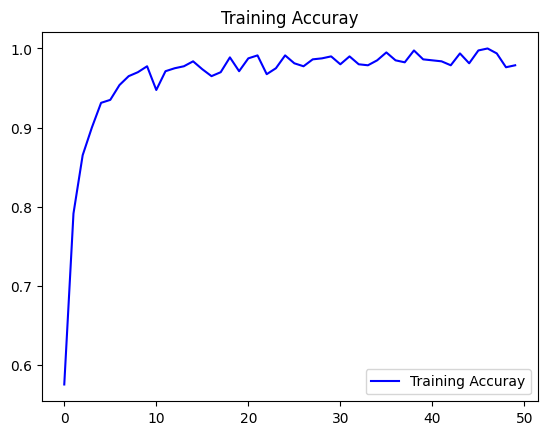

<Figure size 640x480 with 0 Axes>

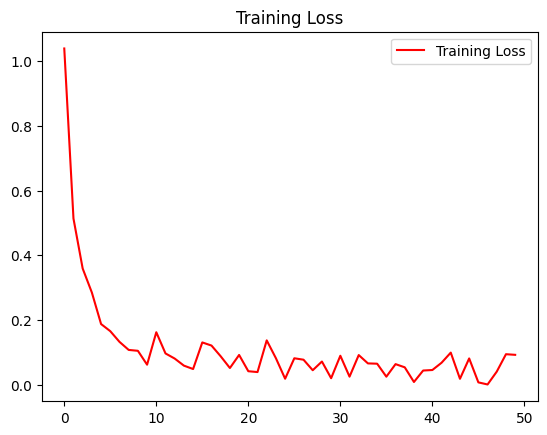

<Figure size 640x480 with 0 Axes>

In [15]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(loss))

import matplotlib.pyplot as plt

plt.plot(epochs, accuracy, 'b', label='Training Accuray')
plt.title('Training Accuray')
plt.legend(loc=0)
plt.figure()
plt.show()

print("")

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training Loss')
plt.legend(loc=0)
plt.figure()
plt.show()